In [194]:
import numpy as np
import pandas as pd
import re
import nltk
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer

In [195]:
chatbot = pd.read_csv("deepnlp/Sheet_1.csv",encoding = 'latin-1')
resume = pd.read_csv("deepnlp/Sheet_2.csv", encoding = 'latin-1')

In [196]:
chatbot.head()

,response_id,class,response_text,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,response_1,not_flagged,I try and avoid this sort of conflict,NaN,NaN,NaN,NaN,NaN
1,response_2,flagged,Had a friend open up to me about his mental ad...,NaN,NaN,NaN,NaN,NaN
2,response_3,flagged,I saved a girl from suicide once. She was goin...,NaN,NaN,NaN,NaN,NaN
3,response_4,not_flagged,i cant think of one really...i think i may hav...,NaN,NaN,NaN,NaN,NaN
4,response_5,not_flagged,Only really one friend who doesn't fit into th...,,NaN,NaN,NaN,NaN


In [197]:
cols = ['response_id','class','response_text']
chatbot = chatbot[cols]

In [198]:
chatbot.head()

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [199]:
chatbot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

In [200]:
Encode = LabelEncoder()
chatbot['Label'] = Encode.fit_transform(chatbot['class'])
# 1 - not_flagged
# 0 - flagged

In [201]:
chatbot['Label'].value_counts()

1    55
0    25
Name: Label, dtype: int64

In [202]:
#Naive_Bayes
x = chatbot.response_text
y = chatbot.Label
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=.3, random_state=1)
vect = CountVectorizer()
trainv = vect.fit_transform(X_train)
testv = vect.transform(X_test)
MNB = MultinomialNB()
MNB = MNB.fit(trainv, y_train)
y_predict = MNB.predict(testv)
acc = accuracy_score(y_test,y_predict)
print(acc)

0.6666666666666666


In [203]:
#Random_Forest
rf = RandomForestClassifier(max_features=10,max_depth=10)
rf = rf.fit(trainv, y_train)
rf_predict = rf.predict(testv)
acc = accuracy_score(rf_predict,y_test)
print(acc)

0.7916666666666666


**Deep Learning**

In [204]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import to_categorical

In [205]:
x_col = chatbot.iloc[1:, 2] 
y_col = chatbot.iloc[1:, 1] 

In [206]:
num_classes = len(list(set(y_col)))
y_int_to_label = {idx:label for idx,label in enumerate(set(y_col))}
y_label_to_int = {label:idx for idx,label in enumerate(set(y_col))}
y_int = np.array([y_label_to_int[label] for label in y_col])
print(y_int)

[1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1
 0 1 0 1 0]


In [207]:
vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(x_col)
y_vect = to_categorical(y_int)

In [208]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y_vect, test_size=0.3)

In [209]:
model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=x_vect.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(128, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_61 (Dense)             (None, 256)               168448    
_________________________________________________________________
dropout_40 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_62 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_41 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_42 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_64 (Dense)             (None, 2)                 130       
Total para

In [210]:
num_epochs = 30
hist = model.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=num_epochs, 
    verbose=2, 
    validation_split=0.25)

Train on 41 samples, validate on 14 samples
Epoch 1/30
 - 1s - loss: 0.6703 - acc: 0.6585 - val_loss: 0.6590 - val_acc: 0.6429
Epoch 2/30
 - 0s - loss: 0.5521 - acc: 0.8537 - val_loss: 0.5944 - val_acc: 0.7857
Epoch 3/30
 - 0s - loss: 0.4417 - acc: 0.9024 - val_loss: 0.5413 - val_acc: 0.7857
Epoch 4/30
 - 0s - loss: 0.2915 - acc: 0.9756 - val_loss: 0.5374 - val_acc: 0.7857
Epoch 5/30
 - 0s - loss: 0.1696 - acc: 1.0000 - val_loss: 0.5525 - val_acc: 0.7143
Epoch 6/30
 - 0s - loss: 0.0814 - acc: 1.0000 - val_loss: 0.5250 - val_acc: 0.7857
Epoch 7/30
 - 0s - loss: 0.0316 - acc: 1.0000 - val_loss: 0.4813 - val_acc: 0.7857
Epoch 8/30
 - 0s - loss: 0.0139 - acc: 1.0000 - val_loss: 0.4531 - val_acc: 0.7857
Epoch 9/30
 - 0s - loss: 0.0046 - acc: 1.0000 - val_loss: 0.4365 - val_acc: 0.7857
Epoch 10/30
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.4279 - val_acc: 0.7857
Epoch 11/30
 - 0s - loss: 0.0020 - acc: 1.0000 - val_loss: 0.4269 - val_acc: 0.7857
Epoch 12/30
 - 0s - loss: 8.9101e-04 - ac

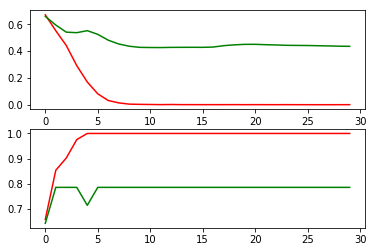

In [211]:
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['acc']
val_acc    = hist.history['val_acc']
xc         = range(num_epochs)
plt.figure()
plt.subplot(211)
plt.plot(xc, train_loss, color='red')
plt.plot(xc, val_loss, color='green')
plt.subplot(212)
plt.plot(xc, train_acc, color = 'red')
plt.plot(xc, val_acc, color = 'green')
plt.show()


In [212]:
score = model.evaluate(X_test, y_test)
print('Accuracy ', score[1]) #for y test

24/24 [==============================] - 0s 144us/step
Accuracy  0.75


In [213]:
x_col = resume.iloc[1:, 2] 
y_col = resume.iloc[1:, 1] 

In [214]:
num_classes = len(list(set(y_col)))
y_int_to_label = {idx:label for idx,label in enumerate(set(y_col))}
y_label_to_int = {label:idx for idx,label in enumerate(set(y_col))}
y_int = np.array([y_label_to_int[label] for label in y_col])
print(y_int)

[0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 1 0 1 1 0 0 0 0 1 0]


In [215]:
vectorizer = TfidfVectorizer()
x_vect = vectorizer.fit_transform(x_col)
y_vect = to_categorical(y_int)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(x_vect, y_vect, test_size=0.3)

In [217]:
model = Sequential()
model.add(Dense(256, activation='tanh', input_dim=x_vect.shape[1]))
model.add(Dropout(0.3))
model.add(Dense(128, activation='tanh'))
#model.add(Dropout(0.1))
model.add(Dense(64, activation='tanh'))
#model.add(Dropout(0.1))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 256)               2920960   
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_67 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_68 (Dense)             (None, 2)                 130       
Total params: 2,962,242
Trainable params: 2,962,242
Non-trainable params: 0
_________________________________________________________________


In [218]:
num_epochs = 30
hist = model.fit(
    X_train, 
    y_train, 
    batch_size=10, 
    epochs=num_epochs, 
    verbose=2, 
    validation_split=0.25)

Train on 64 samples, validate on 22 samples
Epoch 1/30
 - 2s - loss: 0.5975 - acc: 0.7344 - val_loss: 0.5616 - val_acc: 0.7273
Epoch 2/30
 - 0s - loss: 0.3013 - acc: 0.7812 - val_loss: 0.6022 - val_acc: 0.7273
Epoch 3/30
 - 0s - loss: 0.0582 - acc: 0.9844 - val_loss: 0.5006 - val_acc: 0.7727
Epoch 4/30
 - 0s - loss: 0.0085 - acc: 1.0000 - val_loss: 0.5541 - val_acc: 0.7727
Epoch 5/30
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.6176 - val_acc: 0.7727
Epoch 6/30
 - 0s - loss: 4.2521e-04 - acc: 1.0000 - val_loss: 0.6605 - val_acc: 0.7727
Epoch 7/30
 - 0s - loss: 1.8676e-04 - acc: 1.0000 - val_loss: 0.6857 - val_acc: 0.7727
Epoch 8/30
 - 0s - loss: 1.3696e-04 - acc: 1.0000 - val_loss: 0.6998 - val_acc: 0.7727
Epoch 9/30
 - 0s - loss: 9.8210e-05 - acc: 1.0000 - val_loss: 0.7075 - val_acc: 0.7727
Epoch 10/30
 - 0s - loss: 8.8829e-05 - acc: 1.0000 - val_loss: 0.7119 - val_acc: 0.7727
Epoch 11/30
 - 0s - loss: 7.5763e-05 - acc: 1.0000 - val_loss: 0.7145 - val_acc: 0.7727
Epoch 12/30
 - 0s

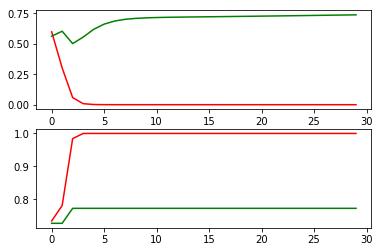

In [219]:
train_loss = hist.history['loss']
val_loss   = hist.history['val_loss']
train_acc  = hist.history['acc']
val_acc    = hist.history['val_acc']
xc         = range(num_epochs)
plt.figure()
plt.subplot(211)
plt.plot(xc, train_loss, color='red')
plt.plot(xc, val_loss, color='green')
plt.subplot(212)
plt.plot(xc, train_acc, color = 'red')
plt.plot(xc, val_acc, color = 'green')
plt.show()

In [220]:
score = model.evaluate(X_test, y_test)
print('Accuracy ', score[1]) #for y test

38/38 [==============================] - 0s 511us/step
Accuracy  0.8947368389681766
